## Categorise the title/content into known set of topic categories

In [20]:
import sys
sys.path.append('../')  # Add the parent directory to the module search path
import pandas as pd
import nltk
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Load the data
mini_data_file_path = '../data/mini_data.csv'
data = pd.read_csv(mini_data_file_path)

# Combine 'title' and 'content' columns into a single text column
data['text'] = data['title'] + ' ' + data['content']

# Preprocess the text data using NLTK
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text.lower())

    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords]

    # Stemming
    tokens = [stemmer.stem(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply the preprocess_text function to the 'text' column
data['preprocessed_text'] = data['text'].apply(preprocess_text)

# Get the preprocessed text data
preprocessed_text_data = data['preprocessed_text']

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the preprocessed text data
X = vectorizer.fit_transform(preprocessed_text_data)

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Apply LDA model to the vectorized data
n_topics = 5  # Number of topics/categories
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Get the most important words for each topic
top_words_per_topic = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    top_words_per_topic.append(top_words)

# Assign categories to the topics
categories = ['Sports', 'Politics', 'Technology', 'Entertainment', 'Health']

# Print the topics and their associated categories
for topic_idx, top_words in enumerate(top_words_per_topic):
    category = categories[topic_idx]
    print(f'Topic {topic_idx + 1}: {", ".join(top_words)} (Category: {category})')

[nltk_data] Downloading package punkt to /home/teddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/teddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: char, nepal, project, asian, south (Category: Sports)
Topic 2: india, char, flood, miss, peopl (Category: Politics)
Topic 3: char, nepal, world, earthquak, climat (Category: Technology)
Topic 4: char, india, activ, sim, date (Category: Entertainment)
Topic 5: char, india, israel, court, nepal (Category: Health)


## Topics and Trends Analysis

[nltk_data] Downloading package punkt to /home/teddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/teddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


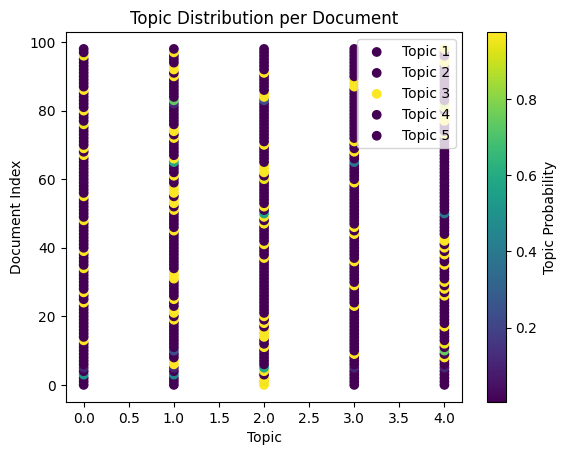

In [27]:
import nltk
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')


# Combine title and content into a single text column
mini_data['text'] = mini_data['title'] + ' ' + mini_data['content']

# Preprocessing
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords]
    tokens = [stemmer.stem(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

mini_data['preprocessed_text'] = mini_data['text'].apply(preprocess_text)
preprocessed_text_data = mini_data['preprocessed_text']

# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_text_data)
feature_names = vectorizer.get_feature_names_out()

# Latent Dirichlet Allocation
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Extract top words per topic
top_words_per_topic = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    top_words_per_topic.append(top_words)

# Plotting
for idx, top_words in enumerate(top_words_per_topic):
    plt.scatter([idx] * len(mini_data), mini_data.index, c=lda.transform(X)[:, idx], cmap='viridis', label=f"Topic {idx + 1}")

plt.xlabel('Topic')
plt.ylabel('Document Index')
plt.title('Topic Distribution per Document')
plt.colorbar(label='Topic Probability')
plt.legend()
plt.show()